Using device: cuda:0
Number of cat images: 12491
Number of dog images: 12470
Classes: ['Cat', 'Dog']
Class to index mapping: {'Cat': 0, 'Dog': 1}
Training dataset size: 19967
Validation dataset size: 4992


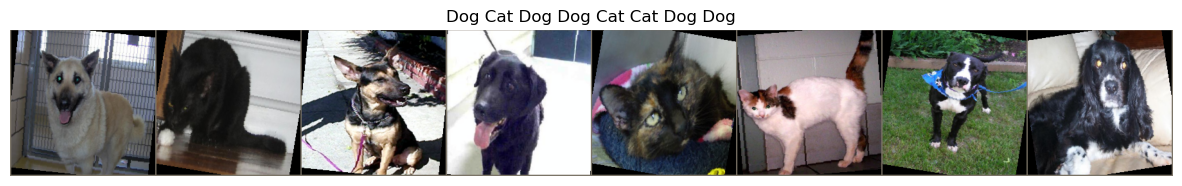

Loading pre-trained VGG16 model...
Model prepared and moved to device!
Starting model training...
Epoch 1/10
------------------------------


c:\Users\Zeshan\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
c:\Users\Zeshan\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


train Loss: 0.0623 Acc: 0.9776
val Loss: 0.0317 Acc: 0.9892
Saved new best model with accuracy: 0.9892

Epoch 2/10
------------------------------
train Loss: 0.0589 Acc: 0.9806
val Loss: 0.0341 Acc: 0.9886

Epoch 3/10
------------------------------
train Loss: 0.0614 Acc: 0.9811
val Loss: 0.0343 Acc: 0.9894
Saved new best model with accuracy: 0.9894

Epoch 4/10
------------------------------
train Loss: 0.0636 Acc: 0.9820
val Loss: 0.0379 Acc: 0.9896
Saved new best model with accuracy: 0.9896

Epoch 5/10
------------------------------
train Loss: 0.0633 Acc: 0.9826
val Loss: 0.0463 Acc: 0.9854

Epoch 6/10
------------------------------
train Loss: 0.0570 Acc: 0.9830
val Loss: 0.0349 Acc: 0.9894

Epoch 7/10
------------------------------
train Loss: 0.0592 Acc: 0.9829
val Loss: 0.0337 Acc: 0.9894

Epoch 8/10
------------------------------
train Loss: 0.0590 Acc: 0.9830
val Loss: 0.0332 Acc: 0.9900
Saved new best model with accuracy: 0.9900

Epoch 9/10
------------------------------
trai

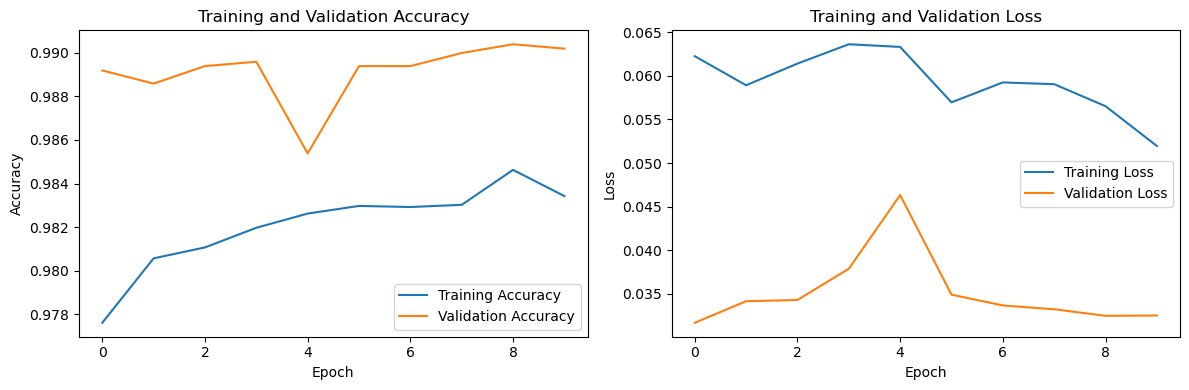

Training complete! Final model saved as 'final_model.pth'
Script completed successfully!


In [1]:
# Cat vs Dog Classifier using PyTorch and VGG16
# A beginner-friendly implementation

# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
from PIL import Image
from torch.utils.data import DataLoader, random_split

# Part 1: Set up environment
# -------------------------------------------------------------------------
# Set random seed for reproducibility (makes results consistent across runs)
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available (CUDA) - this will speed up training significantly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Part 2: Explore dataset
# -------------------------------------------------------------------------
# Define paths to your data
data_dir = 'Pet_Images'  # Main directory containing Cat and Dog folders
cat_dir = os.path.join(data_dir, 'Cat')
dog_dir = os.path.join(data_dir, 'Dog')

# Print how many images we have of each class
if os.path.exists(cat_dir) and os.path.exists(dog_dir):
    print(f"Number of cat images: {len(os.listdir(cat_dir))}")
    print(f"Number of dog images: {len(os.listdir(dog_dir))}")
else:
    print(f"Warning: Check if the directories {cat_dir} and {dog_dir} exist!")

# Part 3: Prepare data for training
# -------------------------------------------------------------------------
# Set image size and batch size
img_size = 224  # VGG16 expects 224x224 pixel images
batch_size = 32  # Number of images processed together

# Define data transformations for training and validation images
# Data augmentation helps the model generalize better
data_transforms = {
    # Training transformations include data augmentation techniques
    'train': transforms.Compose([
        transforms.Resize((img_size, img_size)),  # Resize images
        transforms.RandomHorizontalFlip(),        # Flip images horizontally (50% chance)
        transforms.RandomRotation(10),            # Rotate images slightly
        transforms.ToTensor(),                    # Convert images to PyTorch tensors
        # Normalize with ImageNet mean and std values
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    # Validation transformations only resize and normalize
    'val': transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load the entire dataset first
full_dataset = datasets.ImageFolder(data_dir, transform=data_transforms['train'])

# Print the class names and their numerical indices
class_names = full_dataset.classes
class_to_idx = full_dataset.class_to_idx
print(f"Classes: {class_names}")
print(f"Class to index mapping: {class_to_idx}")

# Split the dataset into training (80%) and validation (20%) sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Use random_split to create the training and validation datasets
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Fix the transforms for each dataset (random_split keeps the original transform)
# We need to create new datasets with the appropriate transforms
train_dataset.dataset = datasets.ImageFolder(data_dir, transform=data_transforms['train'])
val_dataset.dataset = datasets.ImageFolder(data_dir, transform=data_transforms['val'])

# Create data loaders - these will feed batches of images to our model
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Combine into a dictionary for easy access
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

dataset_sizes = {
    'train': len(train_dataset),
    'val': len(val_dataset)
}

print(f"Training dataset size: {dataset_sizes['train']}")
print(f"Validation dataset size: {dataset_sizes['val']}")

# Part 4: Visualize some training images
# -------------------------------------------------------------------------
# Function to display images
def show_images(images, labels):
    """Display a batch of images with their labels."""
    # Create a grid of images
    img_grid = torchvision.utils.make_grid(images)
    
    # Convert from tensor to numpy for display
    img_grid = img_grid.numpy().transpose((1, 2, 0))
    
    # Undo normalization for display
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_grid = std * img_grid + mean
    img_grid = np.clip(img_grid, 0, 1)
    
    # Display the images
    plt.figure(figsize=(15, 8))
    plt.imshow(img_grid)
    
    # Create a title with the class names
    title = [class_names[label] for label in labels]
    plt.title(' '.join(title))
    plt.axis('off')
    plt.show()

# Get a batch of training data and display it
try:
    # Get a batch from the training loader
    inputs, labels = next(iter(dataloaders['train']))
    # Display up to 8 images from the batch
    show_images(inputs[:8], labels[:8])
except Exception as e:
    print(f"Error displaying images: {e}")

# Part 5: Set up the VGG16 model
# -------------------------------------------------------------------------
# Load pre-trained VGG16 model
print("Loading pre-trained VGG16 model...")
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# Freeze all parameters in the model so they won't be updated during training
for param in vgg16.parameters():
    param.requires_grad = False

# Get the number of input features to the classifier
num_features = vgg16.classifier[6].in_features

# Replace the last layer of VGG16's classifier
# The original last layer outputs 1000 classes (for ImageNet)
# We need to change it to output 2 classes (cat and dog)
vgg16.classifier[6] = nn.Linear(num_features, 2)

# Move the model to the GPU if available
model = vgg16.to(device)
print("Model prepared and moved to device!")

# Part 6: Set up the training
# -------------------------------------------------------------------------
# Define loss function (criterion)
criterion = nn.CrossEntropyLoss()

# We only update the parameters of the final layer
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)

# Learning rate scheduler to reduce the learning rate when training plateaus
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min',           # Monitor validation loss
    factor=0.1,           # Reduce learning rate by factor of 10
    patience=3,           # Wait for 3 epochs without improvement
    verbose=True          # Print message when reducing learning rate
)

# Part 7: Define the training function
# -------------------------------------------------------------------------
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    """Train the model and return the best model."""
    # Keep track of training and validation loss/accuracy
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }
    
    # Keep track of the best model weights
    best_model_weights = model.state_dict()
    best_accuracy = 0.0
    
    # Loop over epochs
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 30)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluation mode
            
            running_loss = 0.0
            running_corrects = 0
            
            # Iterate over data batches
            for inputs, labels in dataloaders[phase]:
                # Move inputs and labels to device (GPU if available)
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # Zero the parameter gradients
                optimizer.zero_grad()
                
                # Forward pass
                # track history only in training
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs
                    outputs = model(inputs)
                    
                    # Get predictions
                    _, preds = torch.max(outputs, 1)
                    
                    # Calculate loss
                    loss = criterion(outputs, labels)
                    
                    # Backward pass + optimize only in training
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                # Calculate statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels)
            
            # Calculate epoch loss and accuracy
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            # Print statistics for the epoch
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # Store history
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())
                
                # Update learning rate based on validation loss
                scheduler.step(epoch_loss)
                
                # Save best model
                if epoch_acc > best_accuracy:
                    best_accuracy = epoch_acc
                    best_model_weights = model.state_dict().copy()
                    # Save the best model to disk
                    torch.save(best_model_weights, 'best_model.pth')
                    print(f"Saved new best model with accuracy: {best_accuracy:.4f}")
        
        print()
    
    # After training is complete, load the best model weights
    model.load_state_dict(best_model_weights)
    
    # Plot training history
    plot_training_history(history)
    
    return model, history

# Part 8: Function to plot training history
# -------------------------------------------------------------------------
def plot_training_history(history):
    """Plot the training and validation loss and accuracy."""
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.tight_layout()
    plt.show()

# Part 9: Train the model
# -------------------------------------------------------------------------
print("Starting model training...")
# Set number of epochs
num_epochs = 10

# Train the model
model, history = train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs)

# Save the final model
torch.save(model.state_dict(), 'final_model.pth')
print("Training complete! Final model saved as 'final_model.pth'")

# Part 10: Make predictions on new images
# -------------------------------------------------------------------------
def predict_image(model, image_path):
    """
    Predict if an image contains a cat or a dog.
    
    Args:
        model: Trained PyTorch model
        image_path: Path to the image file
    
    Returns:
        class_name: Predicted class name (Cat or Dog)
        confidence: Confidence score for the prediction
    """
    # Open image
    img = Image.open(image_path)
    
    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    
    # Prepare image for the model
    transform = data_transforms['val']
    img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension
    
    # Set model to evaluation mode
    model.eval()
    
    # Make prediction
    with torch.no_grad():  # No need to track gradients for prediction
        outputs = model(img_tensor)
        # Apply softmax to convert outputs to probabilities
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        # Get the predicted class
        _, predicted_idx = torch.max(outputs, 1)
        
    # Get the class name and confidence
    predicted_class = class_names[predicted_idx.item()]
    confidence = probabilities[0][predicted_idx.item()].item()
    
    # Display results
    print(f"Prediction: {predicted_class}")
    print(f"Confidence: {confidence:.2f} ({confidence*100:.1f}%)")
    
    return predicted_class, confidence

# Example usage (uncomment to use)
# You can use this function to predict any new images
# predict_image(model, 'Pet_Images/Cat/0.jpg')
# predict_image(model, 'Pet_Images/Dog/0.jpg')

# Part 11: Testing multiple images
# -------------------------------------------------------------------------
def test_multiple_images(model, folder_path, num_images=5):
    """
    Test the model on multiple images from a folder.
    
    Args:
        model: Trained PyTorch model
        folder_path: Path to the folder containing images
        num_images: Number of images to test (default: 5)
    """
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    # Select a subset of images
    if len(image_files) > num_images:
        image_files = image_files[:num_images]
    
    print(f"Testing {len(image_files)} images from {folder_path}")
    
    # Test each image
    results = []
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        predicted_class, confidence = predict_image(model, img_path)
        results.append((img_file, predicted_class, confidence))
    
    # Display summary
    print("\nSummary of results:")
    for img_file, predicted_class, confidence in results:
        print(f"Image: {img_file}, Prediction: {predicted_class}, Confidence: {confidence:.2f}")

# Example usage (uncomment to use)
# test_multiple_images(model, 'Pet_Images/Cat', num_images=3)
# test_multiple_images(model, 'Pet_Images/Dog', num_images=3)

print("Script completed successfully!")